### 68. Text Justification

In [ ]:
class Solution:
    def fullJustify(self, words: List[str], maxWidth: int) -> List[str]:
        res = []
        
        # Step 1 extract the string into proper lines
        lines = []
        curr,c_len,spaces = [],0,0
        for word in words:
            if len(word) + c_len + spaces < maxWidth:
                curr.append(word)
                c_len += len(word)
                spaces = len(curr)-1 if len(curr)>1 else 0
            else: 
                if c_len > 0: lines.append([curr.copy(),c_len,spaces])
                curr.clear()
                curr.append(word)
                c_len = len(word)
                spaces = 0
        lines.append([curr,c_len,spaces])
        
        
        # Step 2 properly insert spaces into the lines
        for j,line in enumerate(lines):
            if j == len(lines)-1: # the last line should be left justfified
                s = " ".join(lines[j][0])
                res.append(s.ljust(maxWidth))
                break
            fields,available = line[2],maxWidth-line[1]
            per_field = available // fields if fields > 0 else available
            extra = available % fields if fields > 0 else 0
            
            s = ""
            for i,word in enumerate(line[0]):
                s += word
                if i == len(line[0])-1: 
                    if i == 0: s = s.ljust(maxWidth) # left justify lines containing one word
                    break # dont add spaces after the last word in a line
                s += "".rjust(per_field)
                if extra: 
                    s += " "
                    extra -= 1
            res.append(s)
        
        return res

- I solved this problem in two distinct steps.
- The first step is to fill a list of `lines` using a greedy approach (we keep adding words to a `line` as long as the sum of their length plus one space between every two words doesn't exceed `maxWidth`).
- The second step is to convert every `line` into a string, making sure to insert the proper amount of spaces between words.

### 135. Candy

In [ ]:
class Solution:
    def candy(self, ratings: List[int]) -> int:
        candies = [1]*len(ratings)
        
        for i in range(1, len(ratings)):
            if ratings[i] > ratings[i-1]:
                candies[i] = candies[i-1]+1
                
        for i in range(len(ratings)-2,-1,-1):
            if ratings[i] > ratings[i+1] and candies[i] <= candies[i+1]:
                candies[i] = candies[i+1]+1
                
        return sum(candies)

- This problem could be solved by doing two passes over the given `ratings`. One pass from left to right, and the other pass from right to left.
- In each pass, we update the amount of candy we give the current child based on their rating compared to the previous child, and we pass over `ratings` from left to right and from right to left to ensure that the constraints are fulfilled in both directions.
- Lastly, we return the total amount of `candies` we had to distribute.

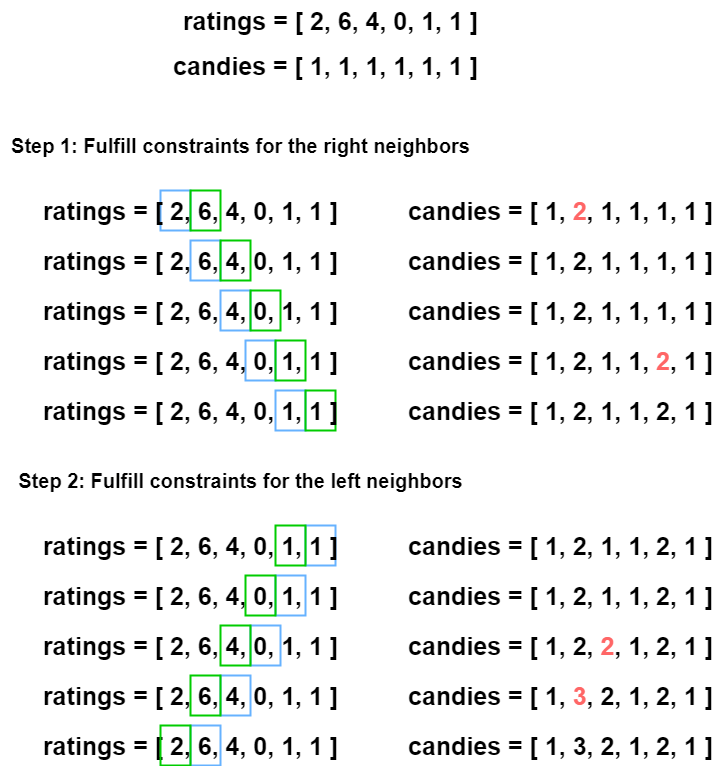

### 646. Maximum Length of Pair Chain

In [ ]:
class Solution:
    def findLongestChain(self, pairs: List[List[int]]) -> int:
        s_pairs = sorted(pairs, key=lambda x: x[1])
        
        curr,count = s_pairs[0],1
        for pair in s_pairs:
            if pair[0] > curr[1]:
                curr = pair
                count += 1

        return count

- This problem could be solved by sorting the given `pairs` by their second values and then iterating over the sorted pairs, `s_pairs`, to construct the largest chain or keep track of its length.
- This works because we are creating groups of `pairs` that are grouped by their second value, and since these groups are ordered in incrementing order, we are guaranteed that the next fitting `pair` that we find in our iteration is the smallest possible next chain link.
- It is also important to note that each group will have at most one chain link that it adds to the chain.

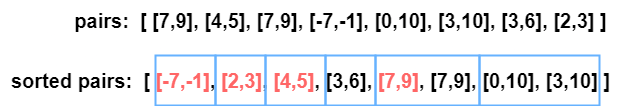

### 1282. Group the People Given the Group Size They Belong To

In [ ]:
class Solution:
    def groupThePeople(self, groupSizes: List[int]) -> List[List[int]]:
        d,res = defaultdict(list),[]
        for person,size in enumerate(groupSizes):
            d[size].append(person)
            if len(d[size]) == size:
                res.append(d[size].copy())
                d[size].clear()
        return res

- The way you could solve this problem was by iterating over `groupSizes` and appending the current index, which represents a `person`, to its respective group in the dictionary `d`.
- Whenever the number of people in a group exceeds the group `size`, add the current group to our results and clear the list in the dictionary.

### 1326. Minimum Number of Taps to Open to Water a Garden

In [ ]:
class Solution:
    def minTaps(self, n: int, ranges: List[int]) -> int:
        intervals = []
        for i,r in enumerate(ranges):
            if r > 0: intervals.append( [i-r,i+r] )
        intervals.sort(key=lambda x: x[0])
        ## filter out the largest interval for each starting point
        for i in range(len(intervals)):
            if i < len(intervals)-1 and intervals[i][0] == intervals[i+1][0]: 
                intervals.pop(i)


        def intervalsFrom(i):
            """
            Returns the number of intervals needed to cover the garden, starting from the interval at index 'i'
            """
            count = 1
            interval = intervals[i]
            # the given interval covers the entire garden
            if interval[1] >= n: return count

            # count how many intervals needed till the end
            j = i+1
            while j < len(intervals):
                # we have covered the entire garden
                if interval[1] >= n: break
                # the next interval does not intersect the current interval (there is a gap that can't be filled)
                if interval[1] < intervals[j][0]: return -1 
                # find the next largest interval 
                max_interval = (float(-inf), -1)
                while j < len(intervals) and interval[1] >= intervals[j][0]: 
                    gain = intervals[j][1] - interval[1]
                    if gain >= max_interval[0]:
                        max_interval = (gain, j)
                    j += 1
                # update index and current interval to the largest interval just found
                count += 1
                j = max_interval[1]
                interval = intervals[j]
                j += 1
                
            # if the last interval we found was not enough to cover the entire garden we have to return -1
            return count if interval[1] >= n else -1


        min_count = 10000
        for i,interval in enumerate(intervals):
            if interval[0] <= 0:
                c = intervalsFrom(i)
                if c < min_count: 
                    min_count = c

        return min_count if min_count < 10000 else -1

- As the hint suggested, we first need to convert the given `ranges` to a list of `intervals`, sorted by their starting point.
- We will then iterate through this list of `intervals`, and using the helper function `intervalsFrom`, we calculate the number of intervals that need to be added on to the current interval in order to cover the entire garden.
- We will keep track of the minimum number of intervals needed to cover the entire garden in the variable `min_count`.

### 1647. Minimum Deletions to Make Character Frequencies Unique

In [ ]:
class Solution:
    def minDeletions(self, s: str) -> int:
        c = collections.Counter(s)
        l,freqs = [],set()
        for count in c.values():
            l.append(count)
        l = list(reversed(sorted(l)))

        deletions = 0
        for i in range(len(l)):
            curr_freq = l[i]
            while curr_freq > 0 and curr_freq in freqs:
                deletions += 1
                curr_freq -= 1
            freqs.add(curr_freq)

        return deletions

- The way I solved this problem was by first creating a list, `l`, containing the frequencies of each letter sorted in non-increasing order.
- I then iterated over `l`, while keeping track of the frequencies already encountered in the set `freqs`, and decreasing the current frequency, `curr_freq`,  until it took on a value that had not been encountered yet.
- Throughout this process, I also kept track of the number of times I decreased a frequency via the variable `deletions`, since **decreasing a frequency n times** is equivalent to **deleting the character for this frequency n times**.

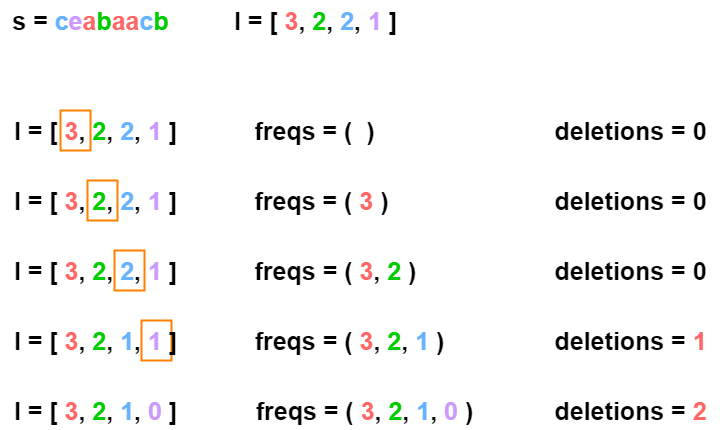

### 2483. Minimum Penalty for a Shop

In [ ]:
class Solution:
    def bestClosingTime(self, customers: str) -> int:
        
        curr_penalty = len([c for c in customers if c == 'Y'])
        min_penalty,res = curr_penalty,0
        
        for i,c in enumerate(customers):
            if c == 'Y':
                curr_penalty -= 1
            else:
                curr_penalty += 1
            
            if curr_penalty < min_penalty:
                min_penalty = curr_penalty
                res = i+1
        
        return res

- Initially, the shop is in a closed state for all time slots. This means that the initial penalty can be calculated via the number of occurrences of the letter `'Y'` in `customers`.
- Then, we iterate over the length of `customers` to simulate opening the store time slot by time slot, and whenever we are opening on a time slot where there are customers in the store (`'Y'`), we decrease the penalty by one, and we increase the penalty by one when there are no customers (`'N'`).
- Throughout this process, we keep track of the time slot for the minimum penalty, `min_penalty`.